Energy Usage Predictor
Use: Save electricity

ML Type: Regression + Time Series

Idea: Predict how much energy your appliances will use during the day and suggest ways to reduce waste.  give the full workflow for this

In [1]:
pip install streamlit pandas numpy scikit-learn matplotlib plotly statsmodels xgboost prophet tensorflow joblib pyyaml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import joblib
import plotly.express as px
import matplotlib.pyplot as plt


In [26]:
import chardet

# Detect the encoding of the file
with open('/content/energy.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")

# Try reading the file in chunks to find the problematic line
try:
    chunksize = 1000
    for i, chunk in enumerate(pd.read_csv('/content/energy.csv', engine='python', encoding=encoding, chunksize=chunksize)):
        print(f"Successfully read chunk {i}")
except Exception as e:
    print(f"Error reading chunk {i}: {e}")

Detected encoding: ascii
Successfully read chunk 0
Successfully read chunk 1
Successfully read chunk 2
Error reading chunk 2: Expected 29 fields in line 3456, saw 51


In [27]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
df = pd.read_csv(url)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [28]:
df = df.drop('date',axis=1)
df=df.dropna()


In [29]:
X=df.drop('Appliances',axis=1)
y=df['Appliances']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
y_pred = model.predict(X_test)
m = mean_absolute_error(y_test, y_pred)
rootmean = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [34]:
print(f"Mean Absolute Error: {m}")
print(f"Root Mean Squared Error: {rootmean}")
print(f"R-squared: {r2}")

Mean Absolute Error: 32.90022802128199
Root Mean Squared Error: 68.41750117245994
R-squared: 0.5322362490073738


In [35]:
joblib.dump(model, "appliance_energy_rf.joblib")


['appliance_energy_rf.joblib']

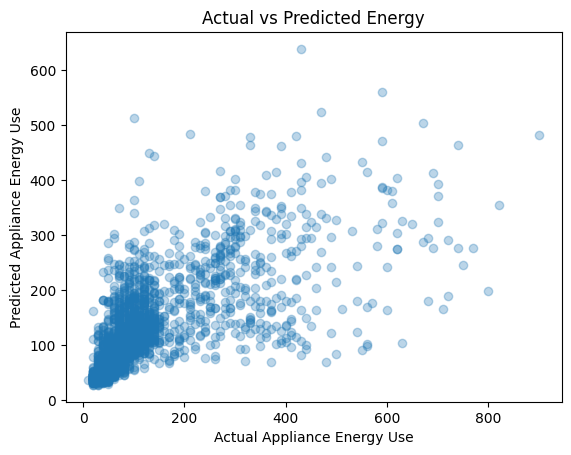

In [36]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Appliance Energy Use")
plt.ylabel("Predicted Appliance Energy Use")
plt.title("Actual vs Predicted Energy")
plt.show()